In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
psin = np.load('in.npy')

In [3]:
# 取得(x, y)周圍8個點的座標
# 這裡注意，range 末尾是開區間，所以要加 1
def get_around(x, y):
    return [(i, j) for i in range(max(0, x - 1), min(psin.shape[1] - 1, x + 1) + 1)
            for j in range(max(0, y - 1), min(psin.shape[0] - 1, y + 1) + 1) if i != x or j != y]

# 取得目前所在座標點的周圍true點(周圍8點中，找到也是true的點)
def get_around_true8(x1,y1):
    a = [x for x in true_list if x in get_around(x1,y1)]
    return a

# 取得目前所在座標點的周圍true點(周圍4點中，找到也是true的點)
def get_around_true4(x1,y1):
    a = [x for x in true_list if x in get_between_xy(x1,y1)]
    return a

# 取得x方向左右兩個座標
def get_between_x(x, y):
    return [(i, y) for i in range(max(0, x - 1), min(psin.shape[1] - 1, x + 1) + 1) if i != x]

# 取得y方向上下兩個座標
def get_between_y(x, y):
    return [(x, j) for j in range(max(0, y - 1), min(psin.shape[0] - 1, y + 1) + 1) if j != y]

# 取得座標(x,y)上下左右四個座標
def get_between_xy(x,y):
    return(get_between_x(x,y) + get_between_y(x,y))

In [4]:
# 每個true點的cost
def Path_cost():
    Dict={}
    true_list=[]
    for y in range(psin.shape[0]):
        for x in range(psin.shape[1]):
            if psin[y][x] == True:
                true_list.append((x,y))
                a = get_around(x,y)
                count = 0
                for xx, yy in a:
                    if psin[yy][xx] == False:
                        count += 1
                Dict[(x,y)]=count
    return Dict

In [5]:
# 所有true點的index
def true_list():
    true_list=[]
    for y in range(psin.shape[0]):
        for x in range(psin.shape[1]):
            if psin[y][x] == True:
#             print(f'({x},{y})')
                true_list.append((x,y))
    return true_list

In [6]:
# 從true_list的第一個座標為起始點，取得其周圍的true點
pc = Path_cost()
def next_step(x,y):
    List=[]
    a = get_around_true4(x,y)
    for xx, yy in a:
        pc[(xx,yy)] += 1  # 將周圍的true點的cost +1
        d = pc[(xx,yy)]
        List.append(d)
    
    if List:
        Max_List = List.index(max(List))
        true_list.remove((x,y))
        return a[Max_List]
    else:
        try:
            true_list.remove((x,y))
            return true_list[0]
        except:
            pass

In [7]:

# 所有點要走的順序
true_list=true_list()
path_sequence = []
path_sequence.append(true_list[0])

a = next_step(true_list[0][0],true_list[0][1])
path_sequence.append(a)

while true_list:
# for _ in range (len(true_list)):
    b = next_step(a[0],a[1])
    if b is not None:
        path_sequence.append(b)
        a = b

In [8]:
p1, p2 = [], []
for px, py in path_sequence:
    p1.append(px)
    p2.append(py)

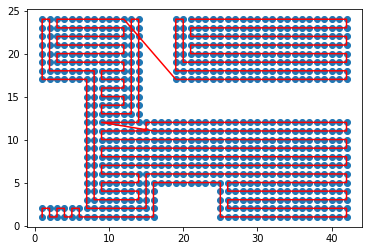

In [10]:
# 创建绘图图表对象，可以不显式创建，跟cv2中的cv2.namedWindow()用法差不多
# plt.figure('Draw')
 
plt.scatter(p1,p2)  # scatter绘制散点图
plt.plot(p1,p2,"r-")
plt.savefig('Lai.png', dpi=200)
 
# plt.draw()  # 显示绘图
# plt.show()

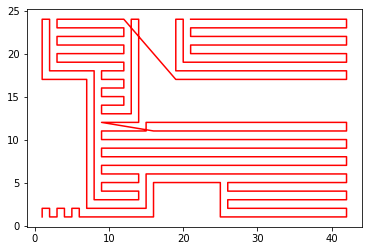

In [14]:
# 创建绘图图表对象，可以不显式创建，跟cv2中的cv2.namedWindow()用法差不多
plt.figure('Draw')
 
# plt.scatter(p1,p2)  # scatter绘制散点图
plt.plot(p1,p2,"r-")
 
# plt.draw()  # 显示绘图
plt.show()

In [44]:
psx = np.load('x.npy')
psy = np.load('y.npy')

In [58]:
point_x,point_y = [],[]
for px,py in path_sequence:
    point_x.append(psx[py][px])
    point_y.append(psy[py][px])

In [59]:
point_x

[1.45,
 1.45,
 1.95,
 1.95,
 2.45,
 2.45,
 2.95,
 2.95,
 3.45,
 3.45,
 3.95,
 3.95,
 4.45,
 4.95,
 5.45,
 5.95,
 6.45,
 6.95,
 7.45,
 7.95,
 8.45,
 8.95,
 8.95,
 8.95,
 8.95,
 8.95,
 9.45,
 9.95,
 10.45,
 10.95,
 11.45,
 11.95,
 12.45,
 12.95,
 13.45,
 13.45,
 13.45,
 13.45,
 13.45,
 13.95,
 14.45,
 14.95,
 15.45,
 15.95,
 16.45,
 16.95,
 17.45,
 17.95,
 18.45,
 18.95,
 19.45,
 19.95,
 20.45,
 20.95,
 21.45,
 21.95,
 21.95,
 21.45,
 20.95,
 20.45,
 19.95,
 19.45,
 18.95,
 18.45,
 17.95,
 17.45,
 16.95,
 16.45,
 15.95,
 15.45,
 14.95,
 14.45,
 13.95,
 13.95,
 14.45,
 14.95,
 15.45,
 15.95,
 16.45,
 16.95,
 17.45,
 17.95,
 18.45,
 18.95,
 19.45,
 19.95,
 20.45,
 20.95,
 21.45,
 21.95,
 21.95,
 21.45,
 20.95,
 20.45,
 19.95,
 19.45,
 18.95,
 18.45,
 17.95,
 17.45,
 16.95,
 16.45,
 15.95,
 15.45,
 14.95,
 14.45,
 13.95,
 13.95,
 14.45,
 14.95,
 15.45,
 15.95,
 16.45,
 16.95,
 17.45,
 17.95,
 18.45,
 18.95,
 19.45,
 19.95,
 20.45,
 20.95,
 21.45,
 21.95,
 21.95,
 21.45,
 20.95,
 20.45,
 19.

In [60]:
point_y

[1.45,
 1.95,
 1.95,
 1.45,
 1.45,
 1.95,
 1.95,
 1.45,
 1.45,
 1.95,
 1.95,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.95,
 2.45,
 2.95,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 2.95,
 2.45,
 1.95,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.45,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 1.95,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.45,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 2.95,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.45,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,
 3.95,

In [56]:
psy[24][21]

12.95

In [57]:
psx[24][21]

11.45

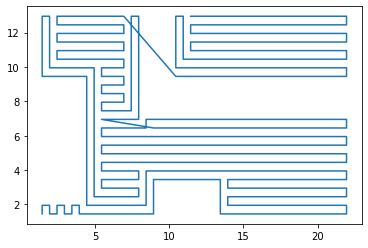

In [61]:
plt.plot(point_x, point_y)